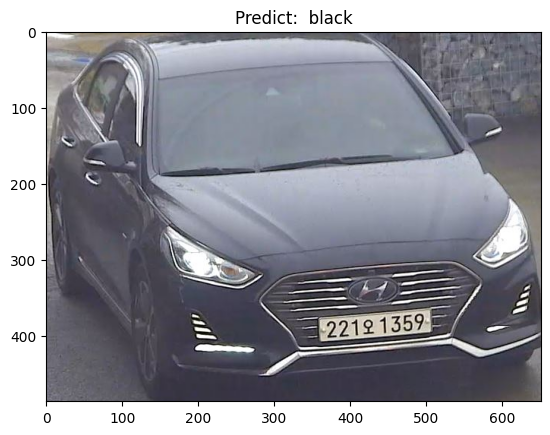

In [23]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

path = "./test/2.JPG"
img = cv2.imread(path) 
color_model = YOLO('colordetection2/train/weights/best.pt')

# valid 폴더 안에 있는 모든 이미지들을 추론한 후 ./runs안에 추론 결과 이미지를 저장
color_result =color_model.predict(source=path, imgsz=640, conf=0.6, verbose = False)

for bbox in color_result[0].boxes:
    # 바운딩 박스 좌표 추출
    x1, y1, x2, y2 = map(int, bbox.xyxy[0])
    # 바운딩 박스 영역 크롭
    # 잡힌 클래스 출력
    class_id = int(color_result[0].boxes.cls)
    confidence = color_result[0].boxes.conf
    class_name = color_model.names[class_id]
    cropped_img = img[y1:y2, x1:x2]
    plt.imshow(cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB))
    plt.title("Predict:  "+color_result[0].names[class_id])